# Extra 07 Regression In Depth
**Workflow**: `data-notebook-refiner`
**Source**: Refactored from `005.회귀모델.ipynb`

---

## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

scikit-learn version 1.2. 이후부터는 load_boston이 삭제되어서 다음과 같이 데이터셋을 불러옴

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="boston", version=1, as_frame=True)
# boston은 sklearn.utils.Bunch 객체
# Python의 딕셔너리와 유사한 구조, 속성에 점(.)으로 접근 가능
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


데이터 로드

In [3]:
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [5]:
df['MEDV'] = data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [7]:
# 참고
# 위와 같이 직접 데이터프레임 생성 가능
# 또한 data.frame에 입력 데이터(data)와 타겟(target)이 합쳐진 데이터프레임이 이미 존재하므로 해당 데이터프레임을 바로 선언 가능
df2 = data.frame
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


train / test 데이터를 분할 합니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
44,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233.0,17.9,389.39,9.55
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233.0,17.9,385.41,4.84
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277.0,18.6,394.87,10.97
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287.0,19.6,393.68,5.08


In [12]:
y_train.head()

44     21.2
41     26.6
334    20.7
206    24.4
325    24.6
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [13]:
import numpy as np

In [14]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [15]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [16]:
my_mse(pred, actual)

np.float64(4.0)

In [17]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [18]:
my_mae(pred, actual)

np.float64(2.0)

In [19]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [20]:
my_rmse(pred, actual)

np.float64(2.0)

### sklearn의 평가지표 활용하기

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(np.float64(2.0), 2.0)

In [23]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(np.float64(4.0), 4.0)

### 모델별 성능 확인을 위한 함수

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(n_jobs=-1)

In [27]:
# 데이터의 CHAS와 RAD가 category 타입이라서 그대로 predict를 하면 TypeError가 발생
# 마찬가지로 train 데이터도 타입을 변경해서 fit을 해주는게 일관성 유지에 도움
x_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

* n_jobs: CPU코어의 사용

In [28]:
# astype으로 타입 변경
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [29]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
pred = model.predict(x_test)

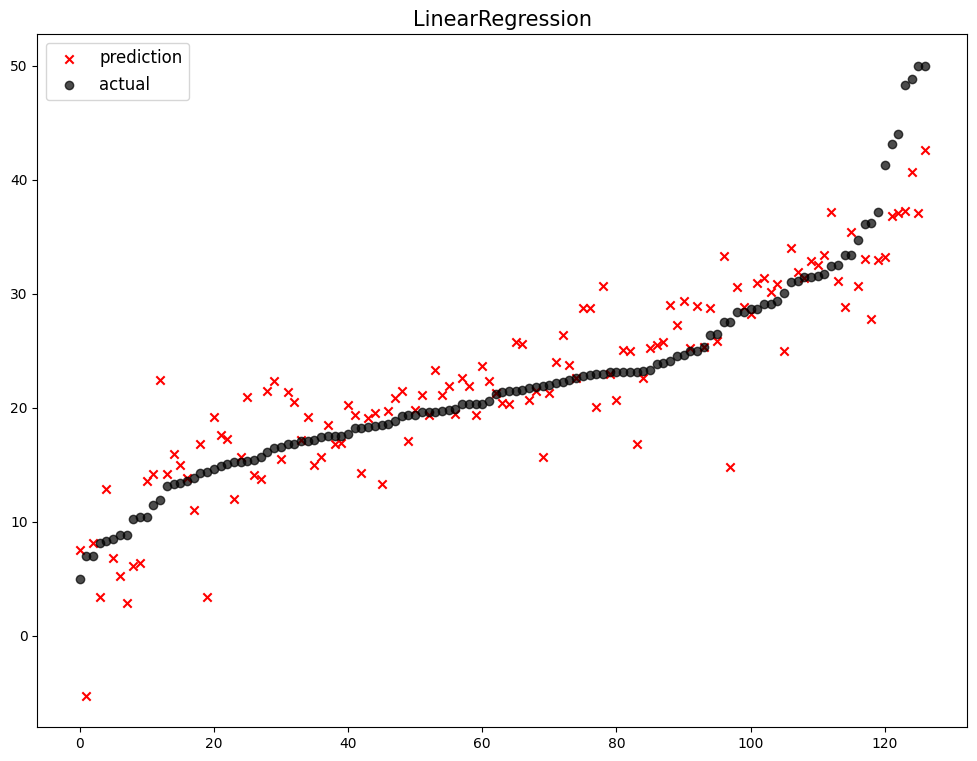

              model        mse
0  LinearRegression  17.520846


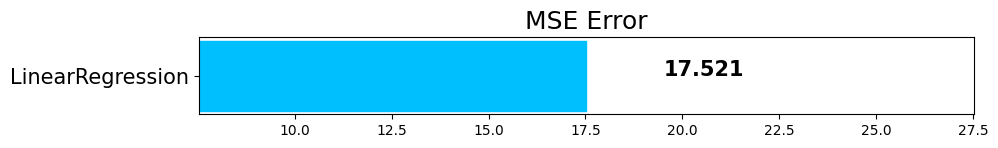

In [31]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [33]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [34]:
from sklearn.linear_model import Lasso

In [35]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

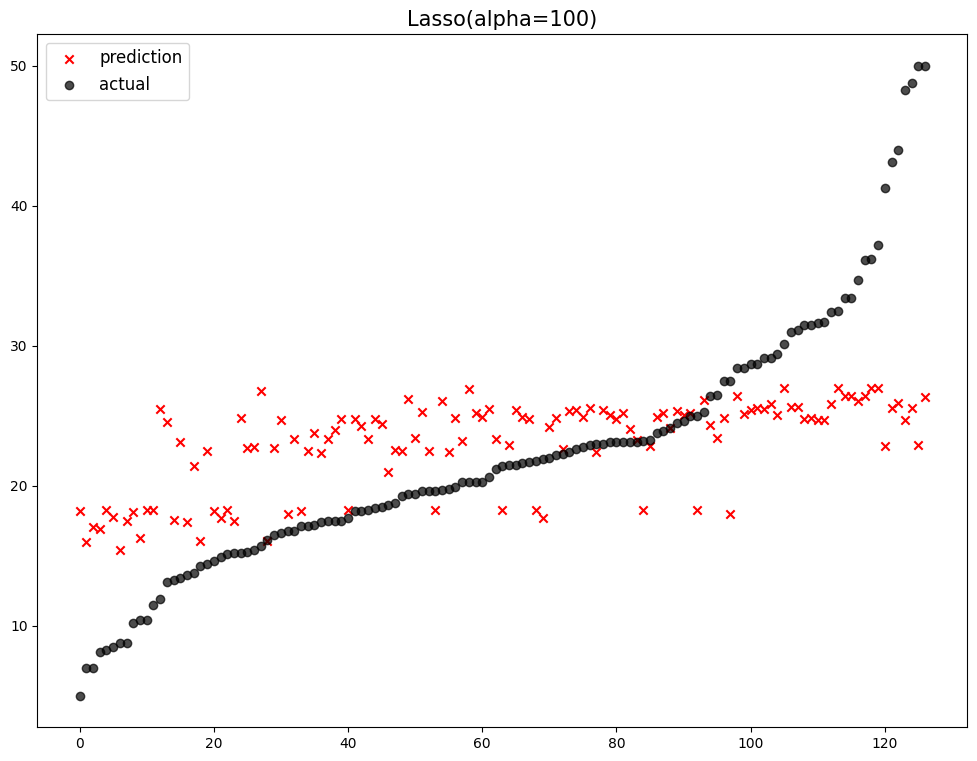

              model        mse
0  Lasso(alpha=100)  57.580296
1  LinearRegression  17.520846


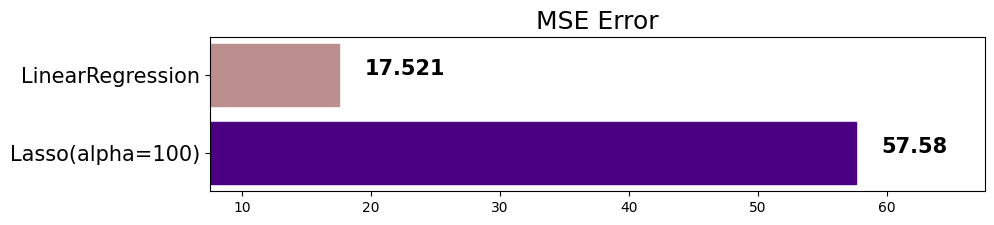

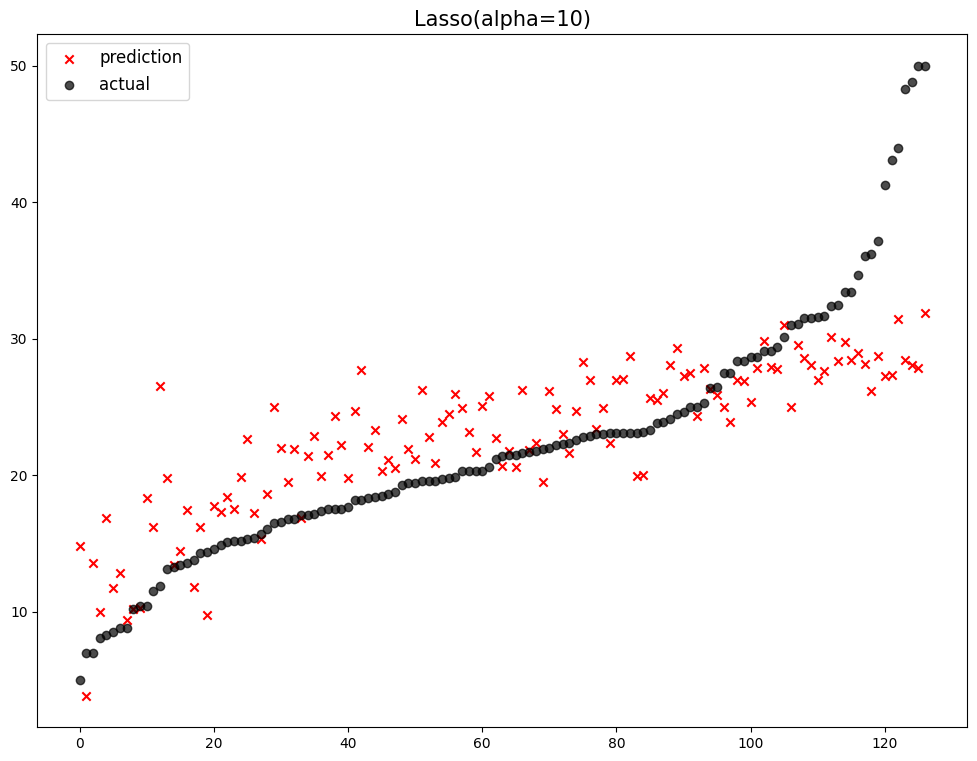

              model        mse
0  Lasso(alpha=100)  57.580296
1   Lasso(alpha=10)  35.045617
2  LinearRegression  17.520846


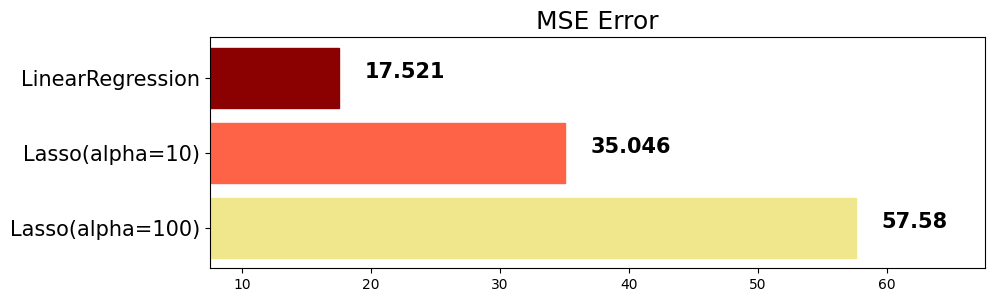

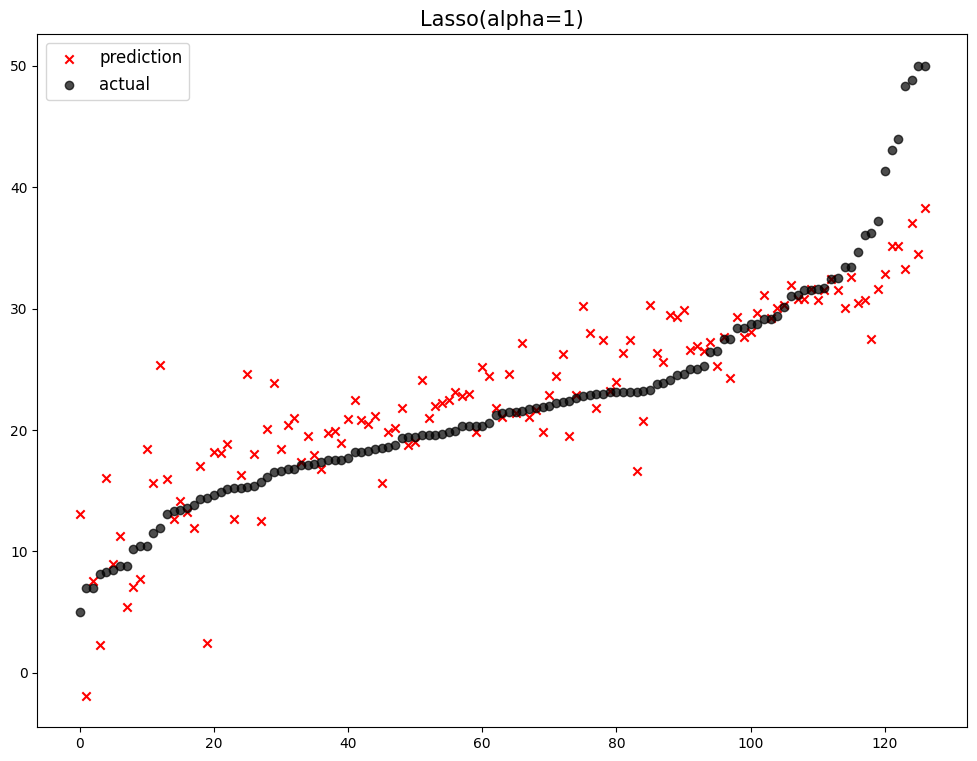

              model        mse
0  Lasso(alpha=100)  57.580296
1   Lasso(alpha=10)  35.045617
2    Lasso(alpha=1)  21.165617
3  LinearRegression  17.520846


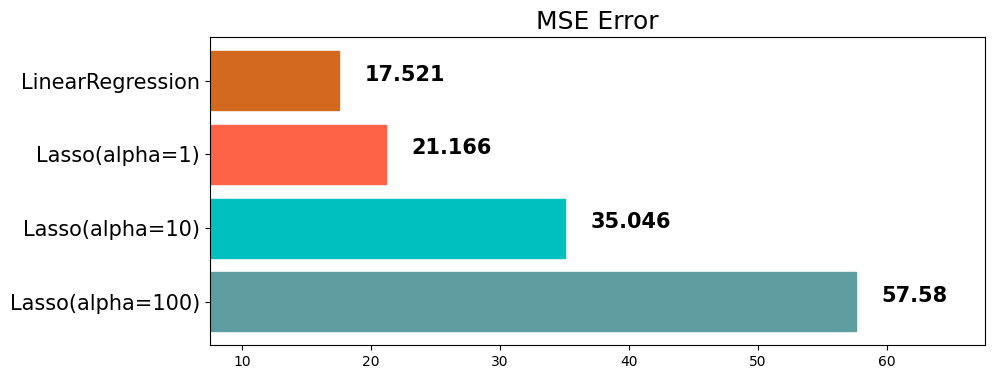

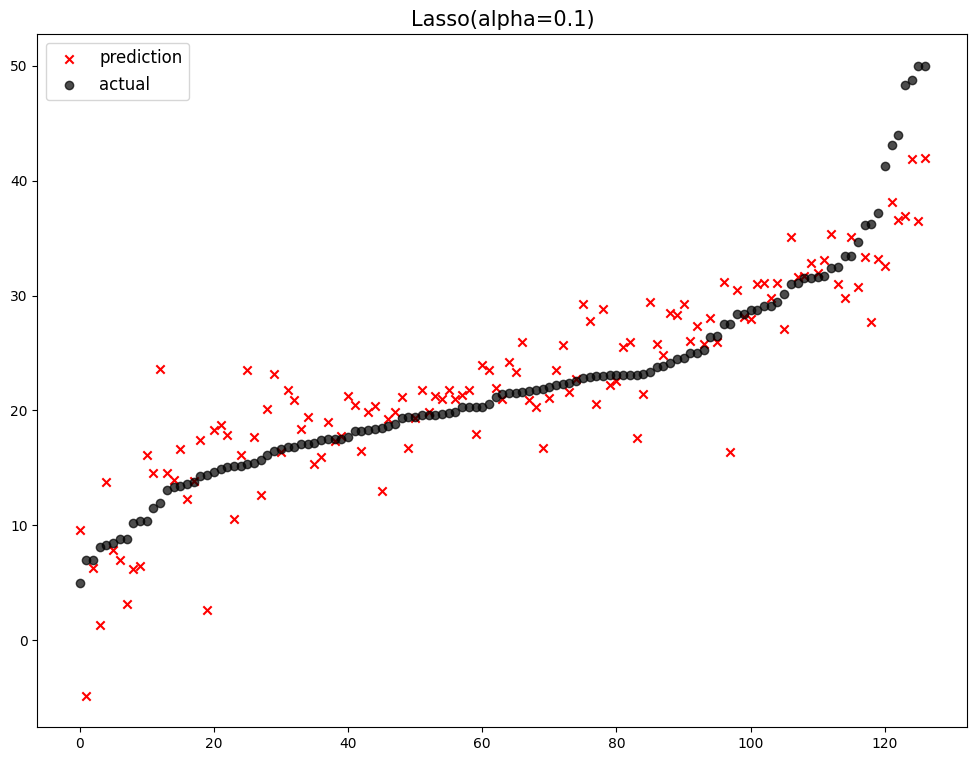

              model        mse
0  Lasso(alpha=100)  57.580296
1   Lasso(alpha=10)  35.045617
2    Lasso(alpha=1)  21.165617
3  Lasso(alpha=0.1)  17.760568
4  LinearRegression  17.520846


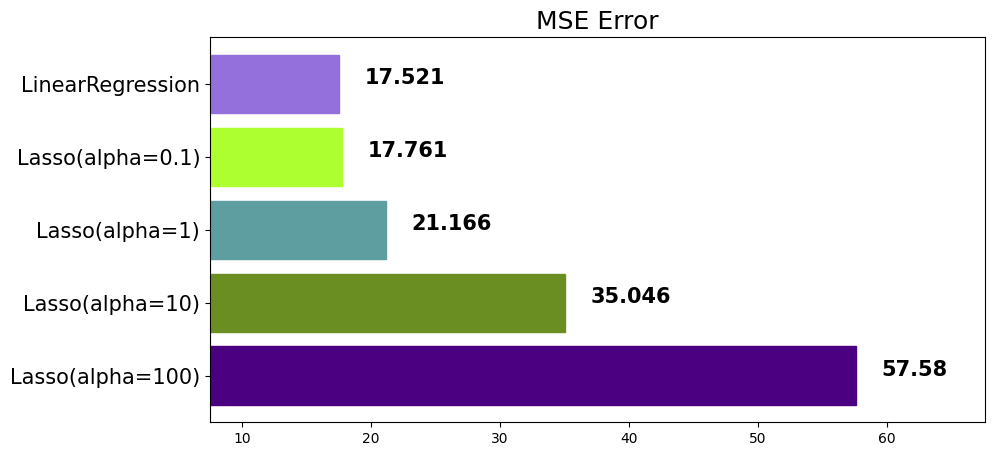

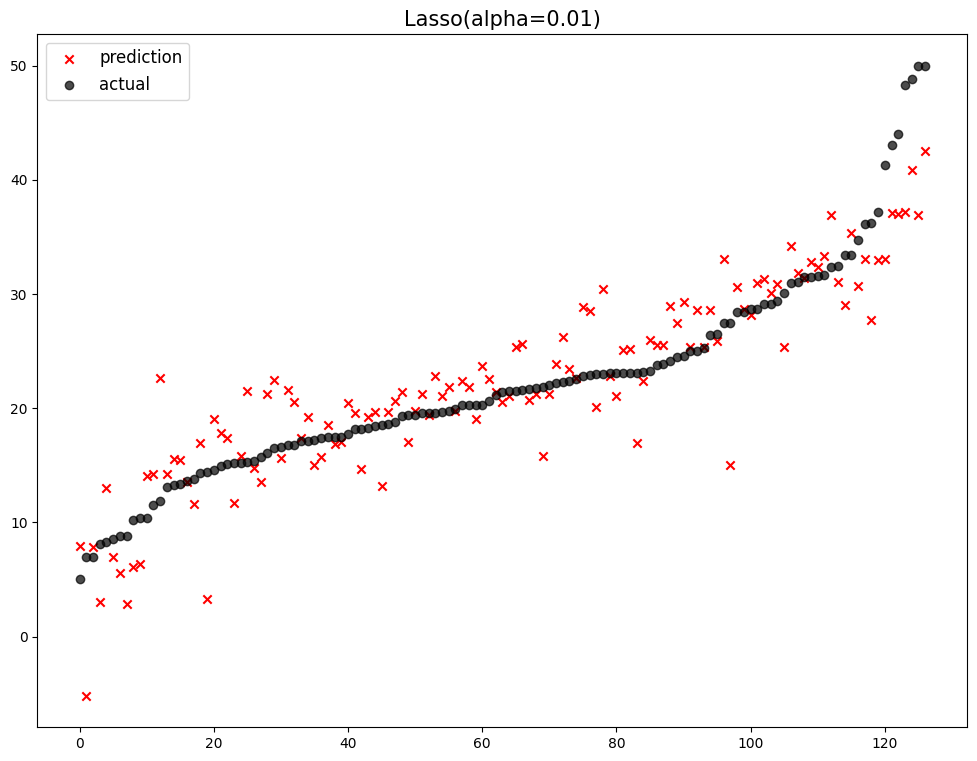

               model        mse
0   Lasso(alpha=100)  57.580296
1    Lasso(alpha=10)  35.045617
2     Lasso(alpha=1)  21.165617
3   Lasso(alpha=0.1)  17.760568
4   LinearRegression  17.520846
5  Lasso(alpha=0.01)  17.409082


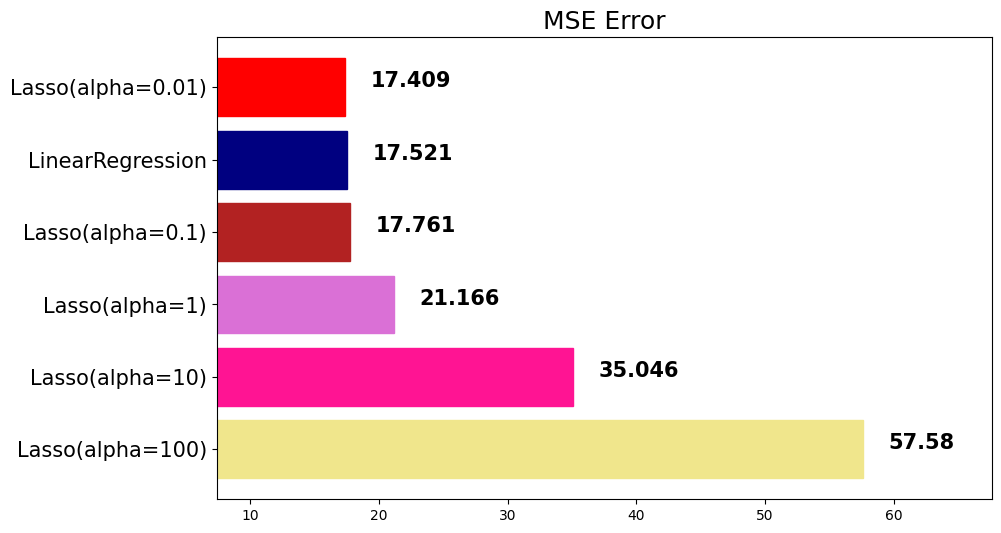

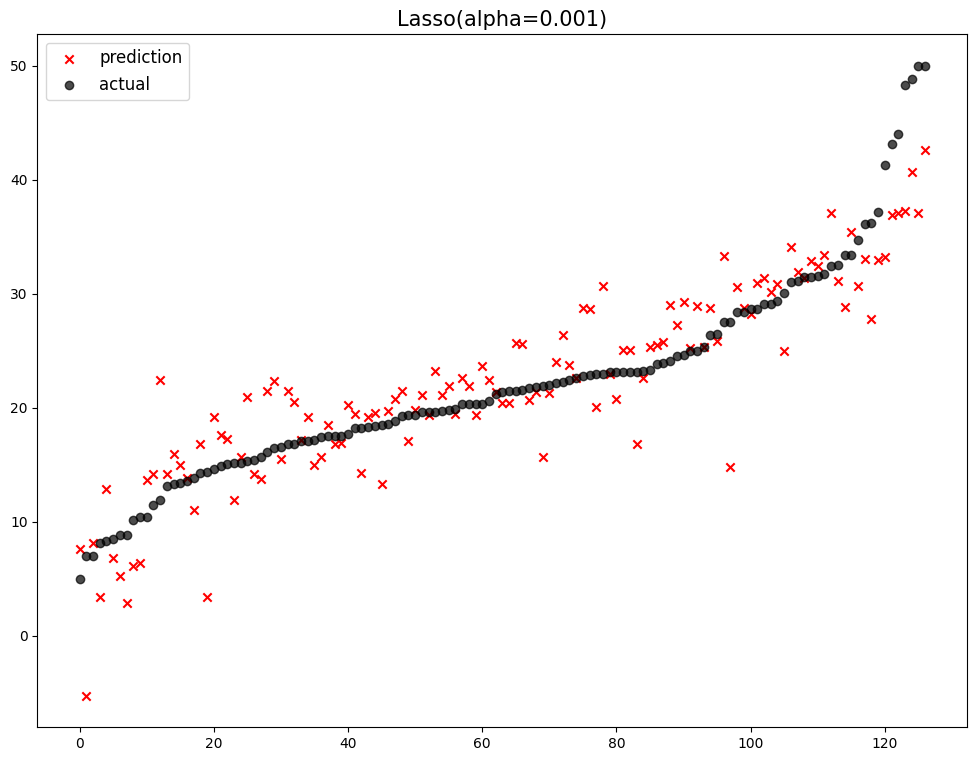

                model        mse
0    Lasso(alpha=100)  57.580296
1     Lasso(alpha=10)  35.045617
2      Lasso(alpha=1)  21.165617
3    Lasso(alpha=0.1)  17.760568
4    LinearRegression  17.520846
5  Lasso(alpha=0.001)  17.505523
6   Lasso(alpha=0.01)  17.409082


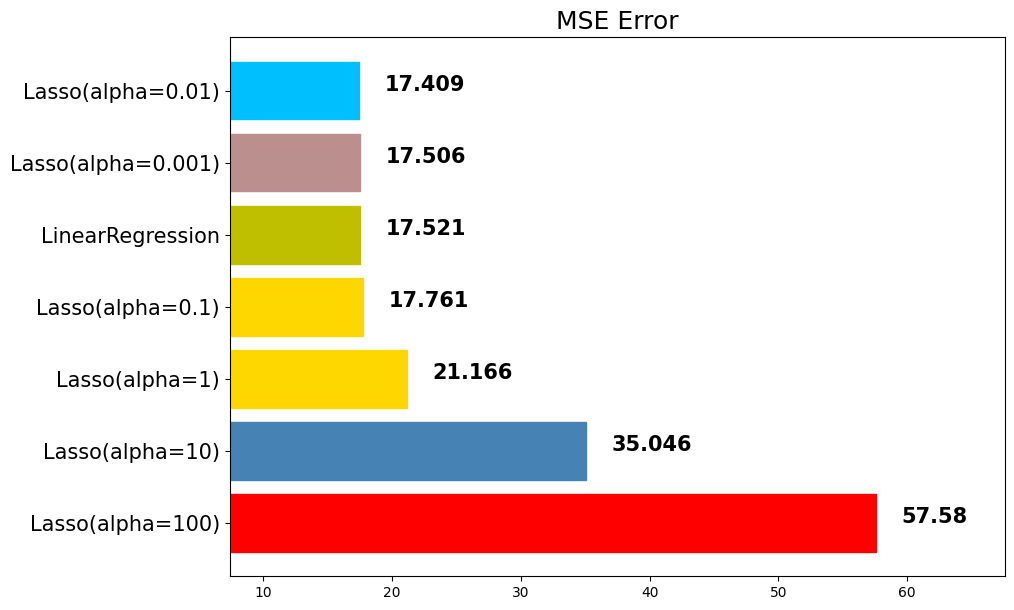

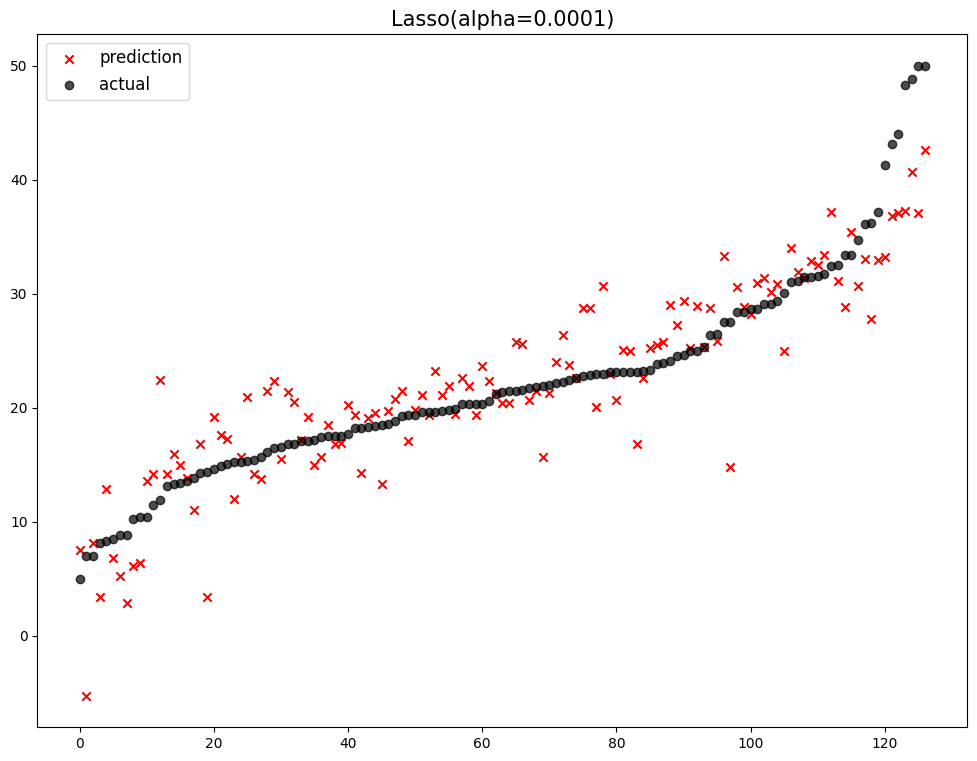

                 model        mse
0     Lasso(alpha=100)  57.580296
1      Lasso(alpha=10)  35.045617
2       Lasso(alpha=1)  21.165617
3     Lasso(alpha=0.1)  17.760568
4     LinearRegression  17.520846
5  Lasso(alpha=0.0001)  17.519268
6   Lasso(alpha=0.001)  17.505523
7    Lasso(alpha=0.01)  17.409082


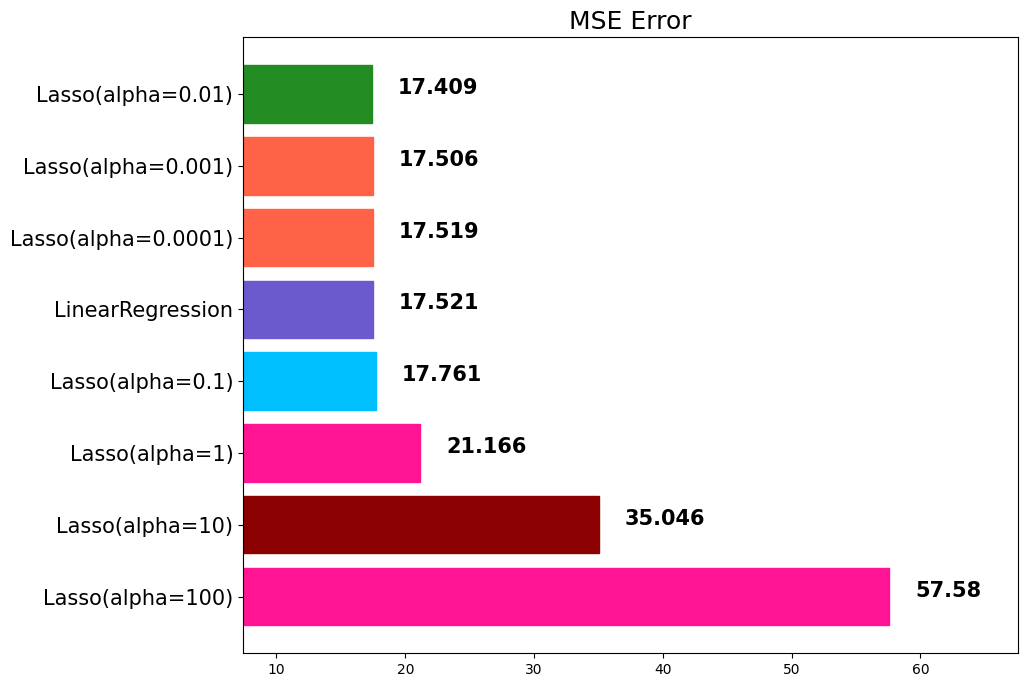

In [36]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [37]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

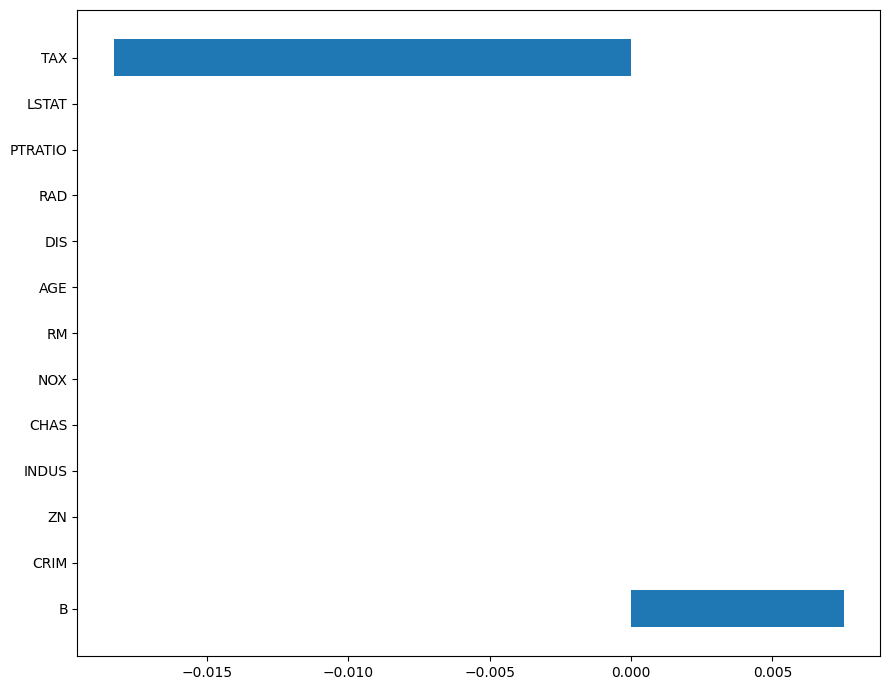

In [38]:
plot_coef(x_train.columns, lasso_100.coef_)

In [39]:
lasso_100.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.01829858,
        0.        ,  0.00751602,  0.        ])

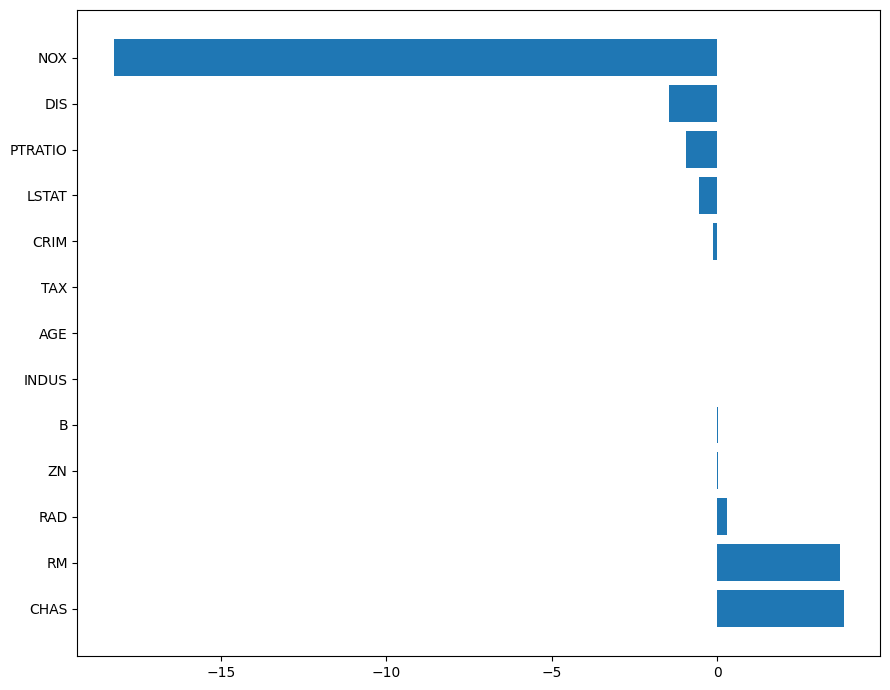

In [40]:
plot_coef(x_train.columns, lasso_001.coef_)

In [41]:
lasso_001.coef_

array([ -0.11640606,   0.03985094,   0.00268343,   3.81811105,
       -18.22870783,   3.72469221,   0.00164019,  -1.46495462,
         0.30299499,  -0.0109772 ,  -0.92805454,   0.01009773,
        -0.55386901])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
ratios = [0.2, 0.5, 0.8]

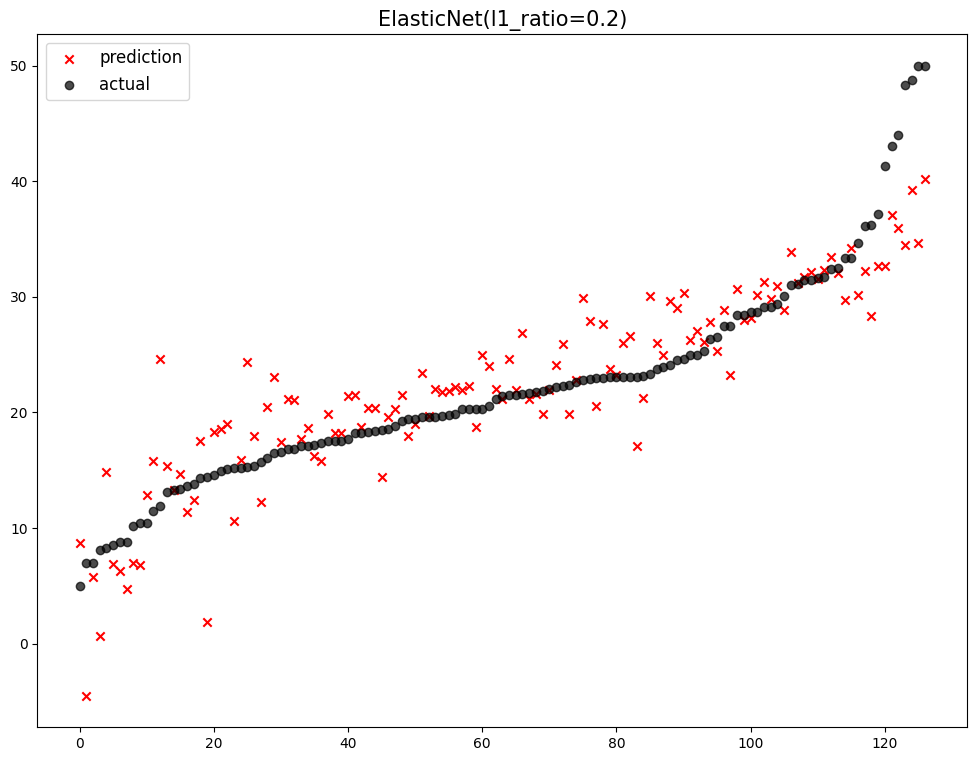

                      model        mse
0          Lasso(alpha=100)  57.580296
1           Lasso(alpha=10)  35.045617
2            Lasso(alpha=1)  21.165617
3  ElasticNet(l1_ratio=0.2)  19.070859
4          Lasso(alpha=0.1)  17.760568
5          LinearRegression  17.520846
6       Lasso(alpha=0.0001)  17.519268
7        Lasso(alpha=0.001)  17.505523
8         Lasso(alpha=0.01)  17.409082


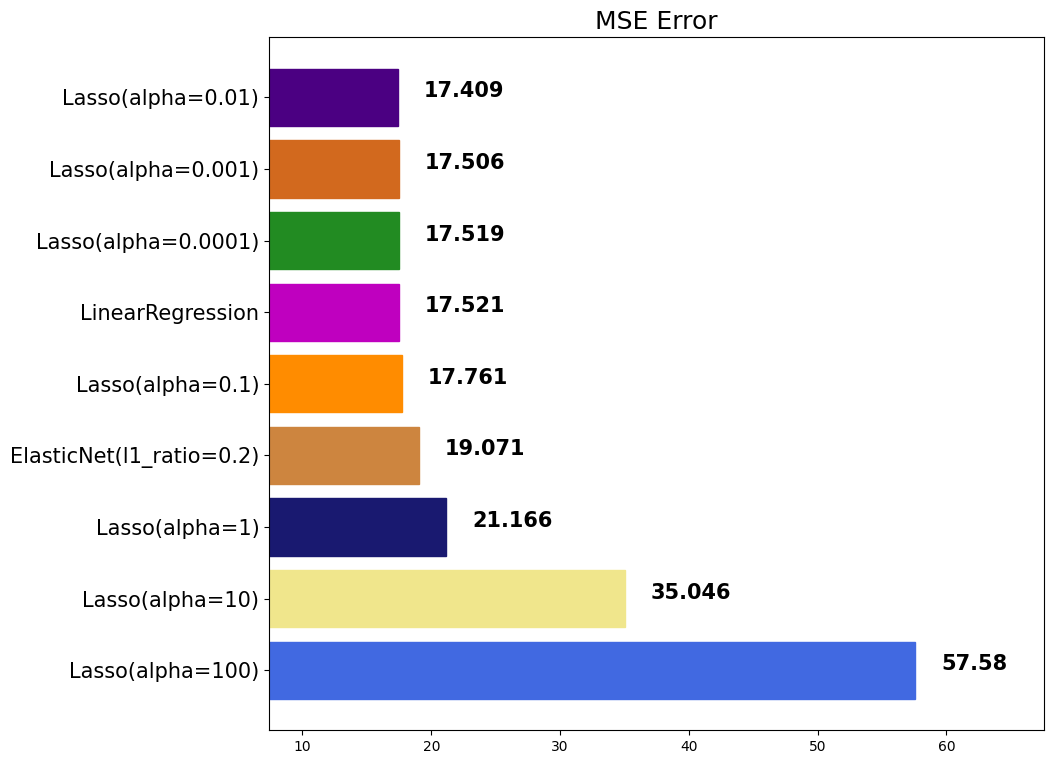

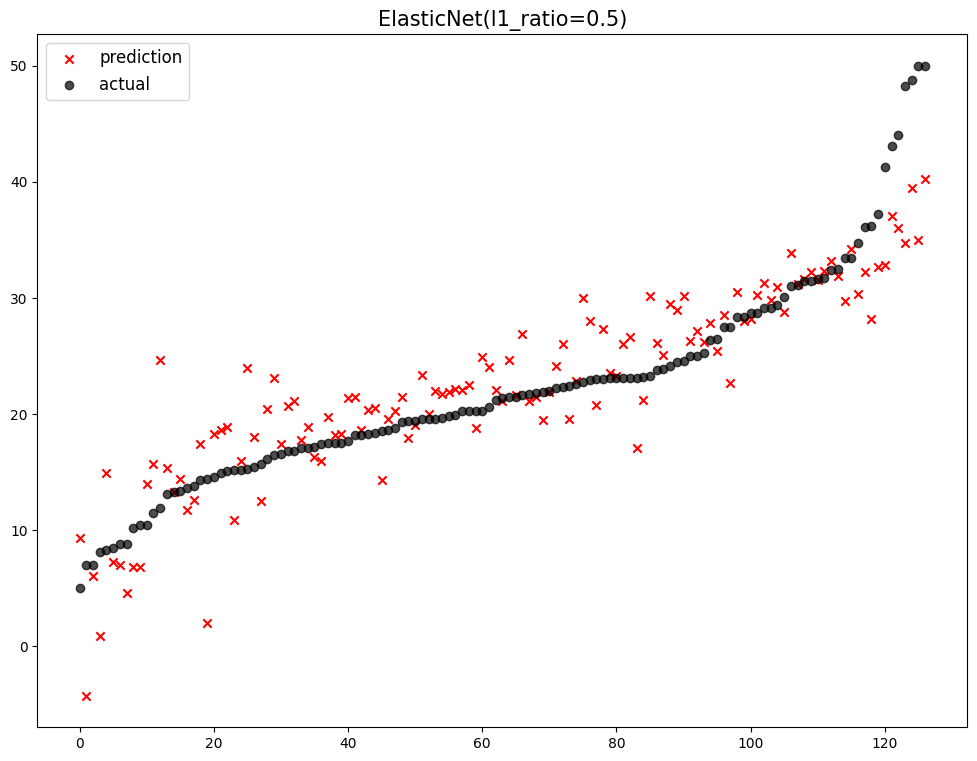

                      model        mse
0          Lasso(alpha=100)  57.580296
1           Lasso(alpha=10)  35.045617
2            Lasso(alpha=1)  21.165617
3  ElasticNet(l1_ratio=0.2)  19.070859
4  ElasticNet(l1_ratio=0.5)  18.732745
5          Lasso(alpha=0.1)  17.760568
6          LinearRegression  17.520846
7       Lasso(alpha=0.0001)  17.519268
8        Lasso(alpha=0.001)  17.505523
9         Lasso(alpha=0.01)  17.409082


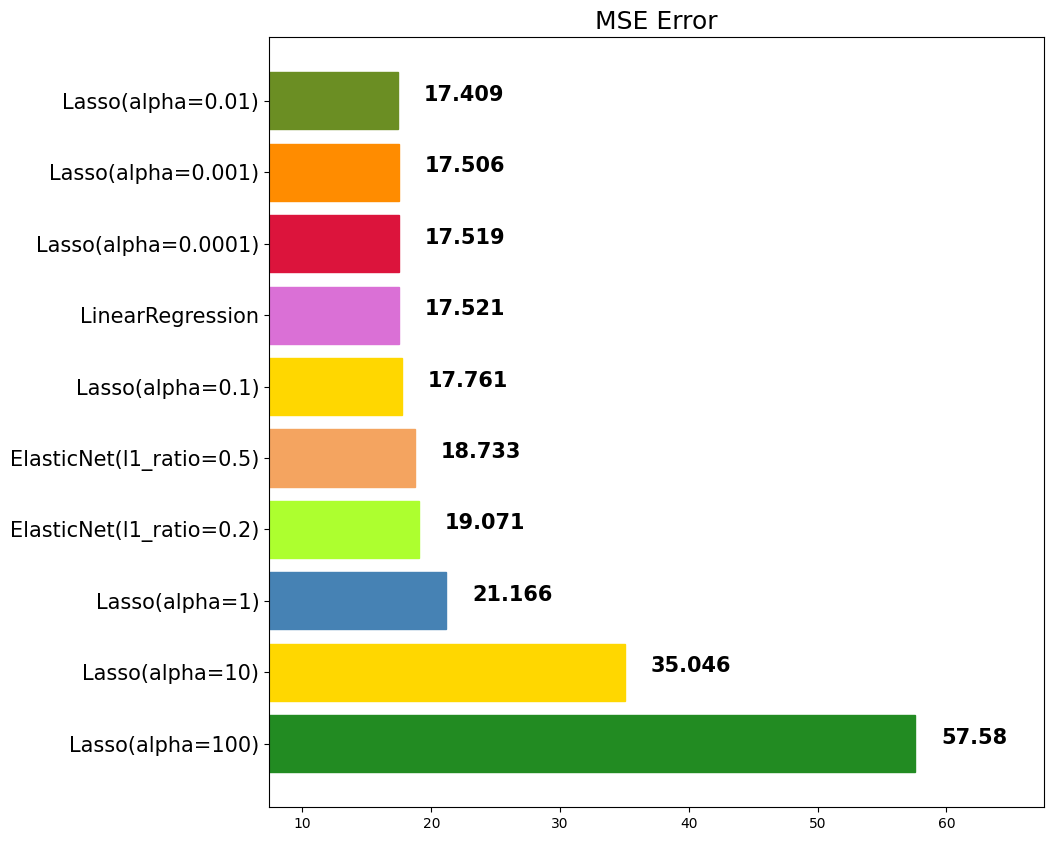

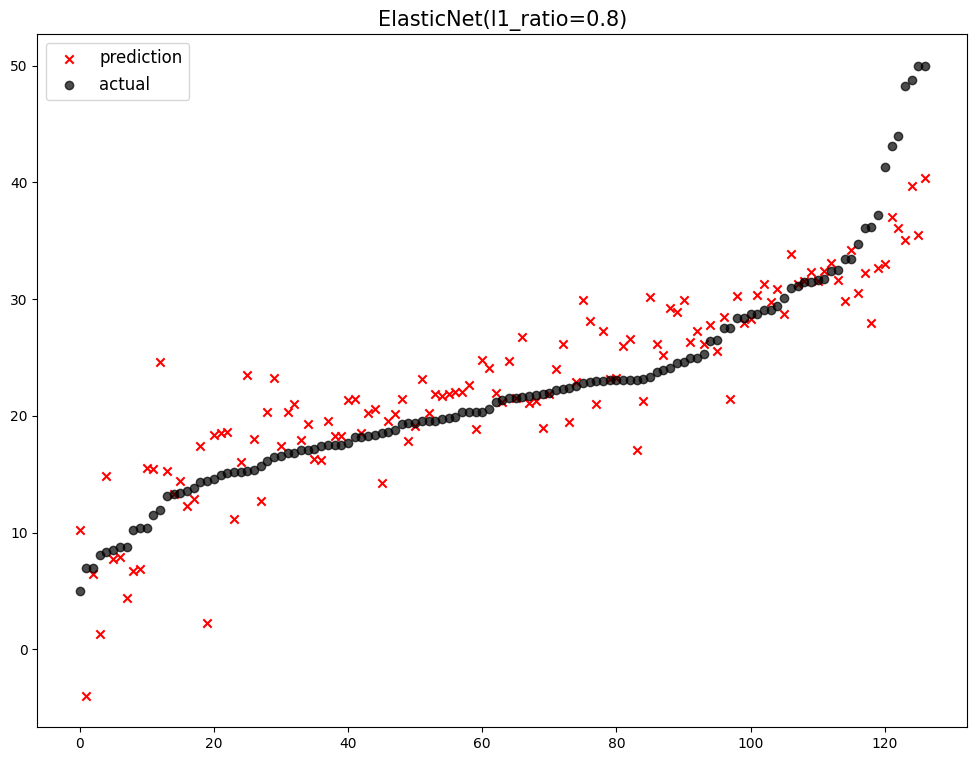

                       model        mse
0           Lasso(alpha=100)  57.580296
1            Lasso(alpha=10)  35.045617
2             Lasso(alpha=1)  21.165617
3   ElasticNet(l1_ratio=0.2)  19.070859
4   ElasticNet(l1_ratio=0.5)  18.732745
5   ElasticNet(l1_ratio=0.8)  18.376396
6           Lasso(alpha=0.1)  17.760568
7           LinearRegression  17.520846
8        Lasso(alpha=0.0001)  17.519268
9         Lasso(alpha=0.001)  17.505523
10         Lasso(alpha=0.01)  17.409082


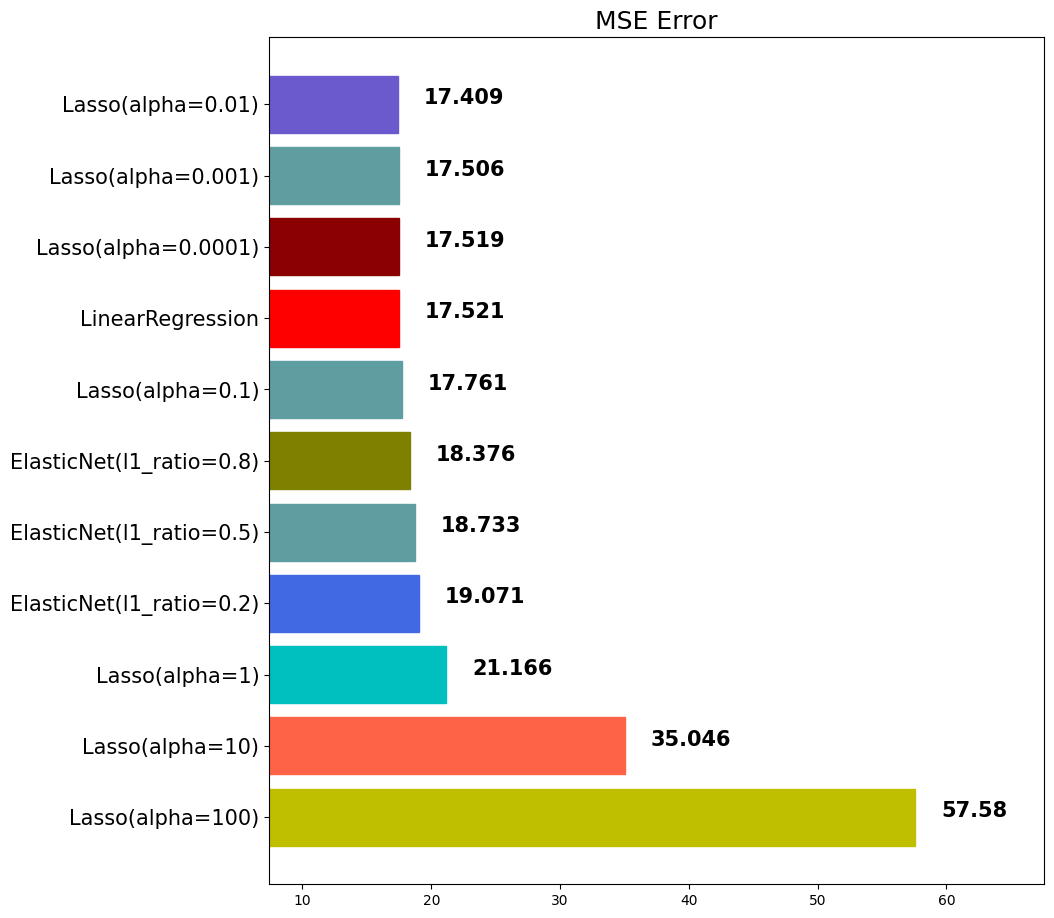

In [44]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [45]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

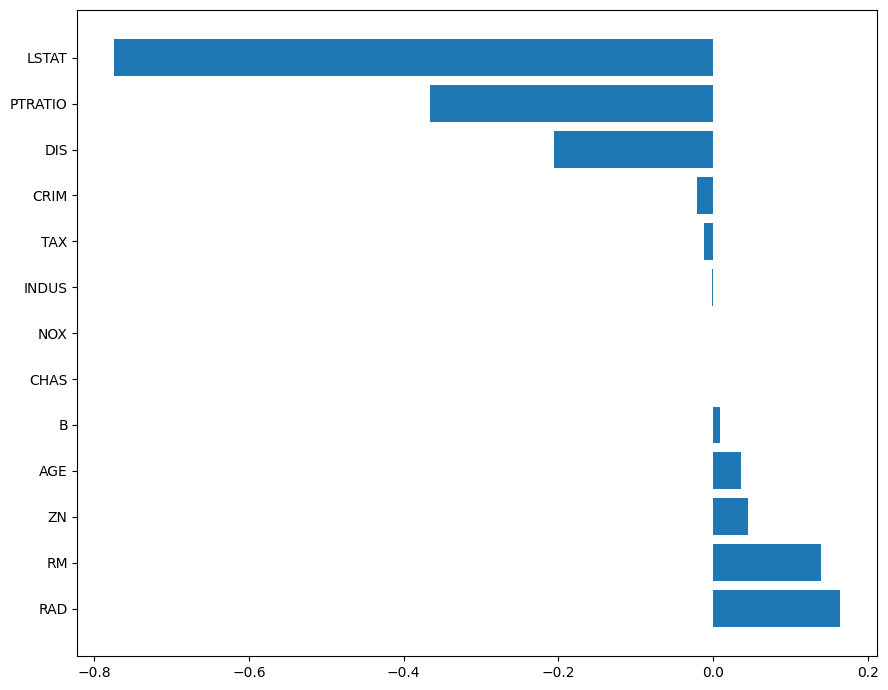

In [46]:
plot_coef(x_train.columns, elsticnet_20.coef_)

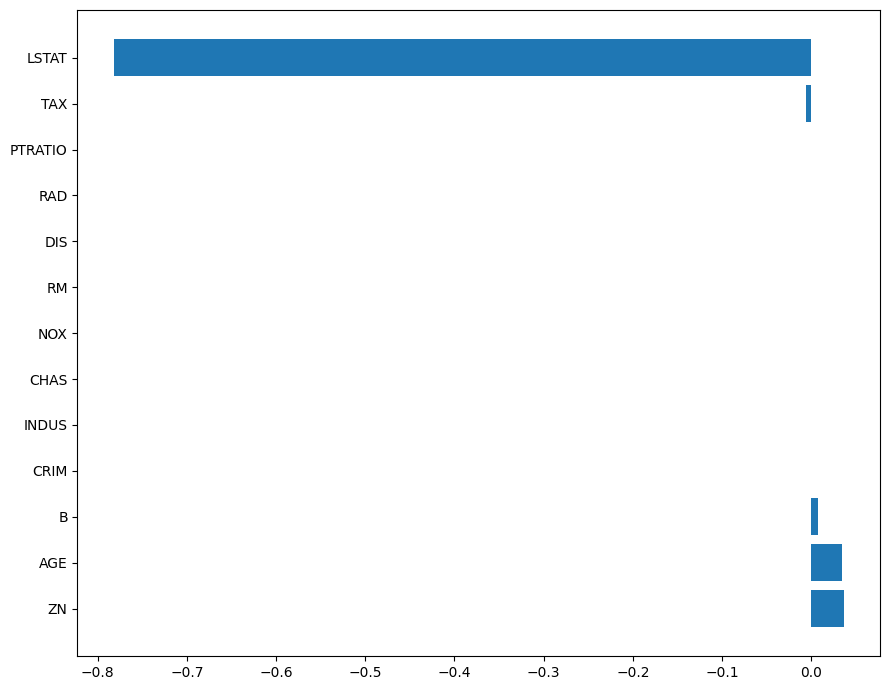

In [47]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [48]:
elsticnet_80.coef_

array([ 0.        ,  0.03625725,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03467945,  0.        ,  0.        , -0.00544768,
       -0.        ,  0.00804184, -0.78172405])

## Scaler

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [50]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.385335,12.146438,11.002955,0.071240,0.552389,6.306789,67.846174,3.859815,9.912929,411.303430,18.460686,353.156253,12.680660
std,6.352444,23.709391,6.745204,0.257566,0.116566,0.693750,28.671453,2.131803,8.898327,170.086642,2.171901,97.292871,7.135457
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082100,0.000000,5.160000,0.000000,0.448000,5.895500,42.700000,2.102150,4.000000,280.000000,17.400000,375.270000,6.910000
50%,0.253560,0.000000,8.560000,0.000000,0.532000,6.211000,76.500000,3.279700,5.000000,330.000000,19.100000,391.710000,11.500000
75%,4.482100,20.000000,18.100000,0.000000,0.631000,6.640000,94.100000,5.287300,24.000000,666.000000,20.200000,396.290000,17.110000
max,51.135800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [51]:
std_scaler = StandardScaler()

In [52]:
std_scaled = std_scaler.fit_transform(x_train)

In [53]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.53,-0.51,-1.57,-0.28,-1.44,-3.53,-2.27,-1.28,-1.00,-1.31,-2.70,-3.63,-1.54
25%,-0.52,-0.51,-0.87,-0.28,-0.90,-0.59,-0.88,-0.83,-0.67,-0.77,-0.49,0.23,-0.81
50%,-0.49,-0.51,-0.36,-0.28,-0.18,-0.14,0.30,-0.27,-0.55,-0.48,0.29,0.40,-0.17
75%,0.17,0.33,1.05,-0.28,0.68,0.48,0.92,0.67,1.59,1.50,0.80,0.44,0.62
max,7.53,3.71,2.48,3.61,2.74,3.57,1.12,3.22,1.59,1.76,1.63,0.45,3.55


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [54]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [55]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.07,0.12,0.39,0.07,0.34,0.50,0.67,0.28,0.39,0.43,0.62,0.89,0.30
std,0.12,0.24,0.25,0.26,0.24,0.14,0.30,0.22,0.39,0.33,0.23,0.25,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.41,0.41,0.10,0.13,0.18,0.51,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.30,0.48,0.76,0.22,0.17,0.27,0.69,0.99,0.27
75%,0.09,0.20,0.65,0.00,0.51,0.56,0.94,0.43,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [56]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [57]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [58]:
from sklearn.pipeline import make_pipeline

In [59]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [60]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

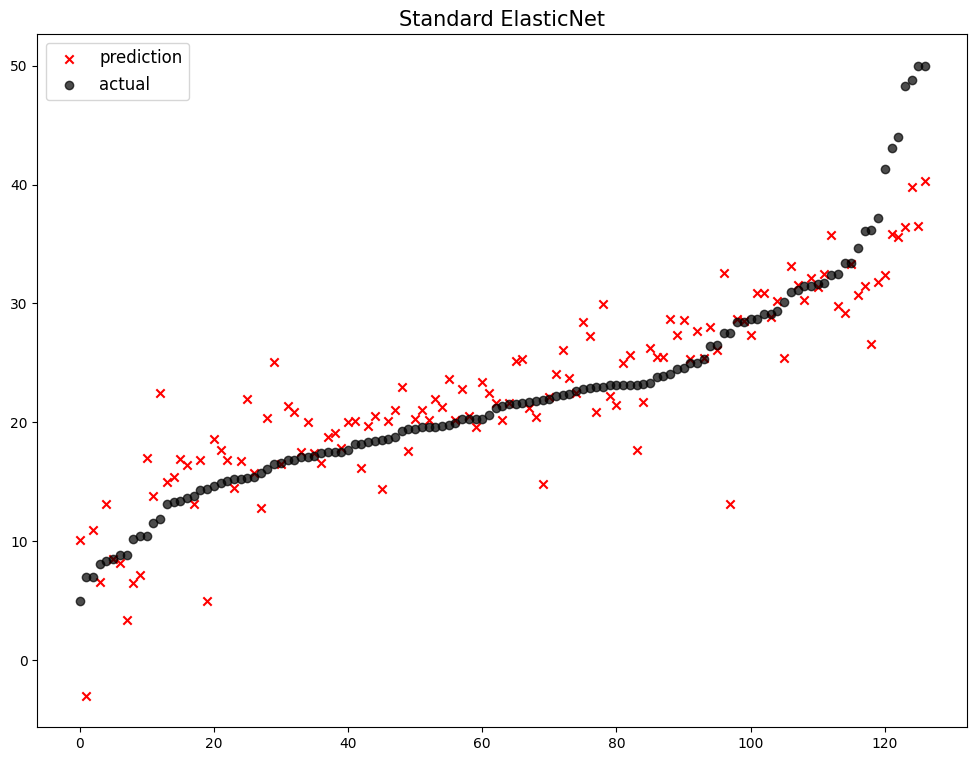

                       model        mse
0           Lasso(alpha=100)  57.580296
1            Lasso(alpha=10)  35.045617
2             Lasso(alpha=1)  21.165617
3   ElasticNet(l1_ratio=0.2)  19.070859
4   ElasticNet(l1_ratio=0.5)  18.732745
5   ElasticNet(l1_ratio=0.8)  18.376396
6        Standard ElasticNet  18.325763
7           Lasso(alpha=0.1)  17.760568
8           LinearRegression  17.520846
9        Lasso(alpha=0.0001)  17.519268
10        Lasso(alpha=0.001)  17.505523
11         Lasso(alpha=0.01)  17.409082


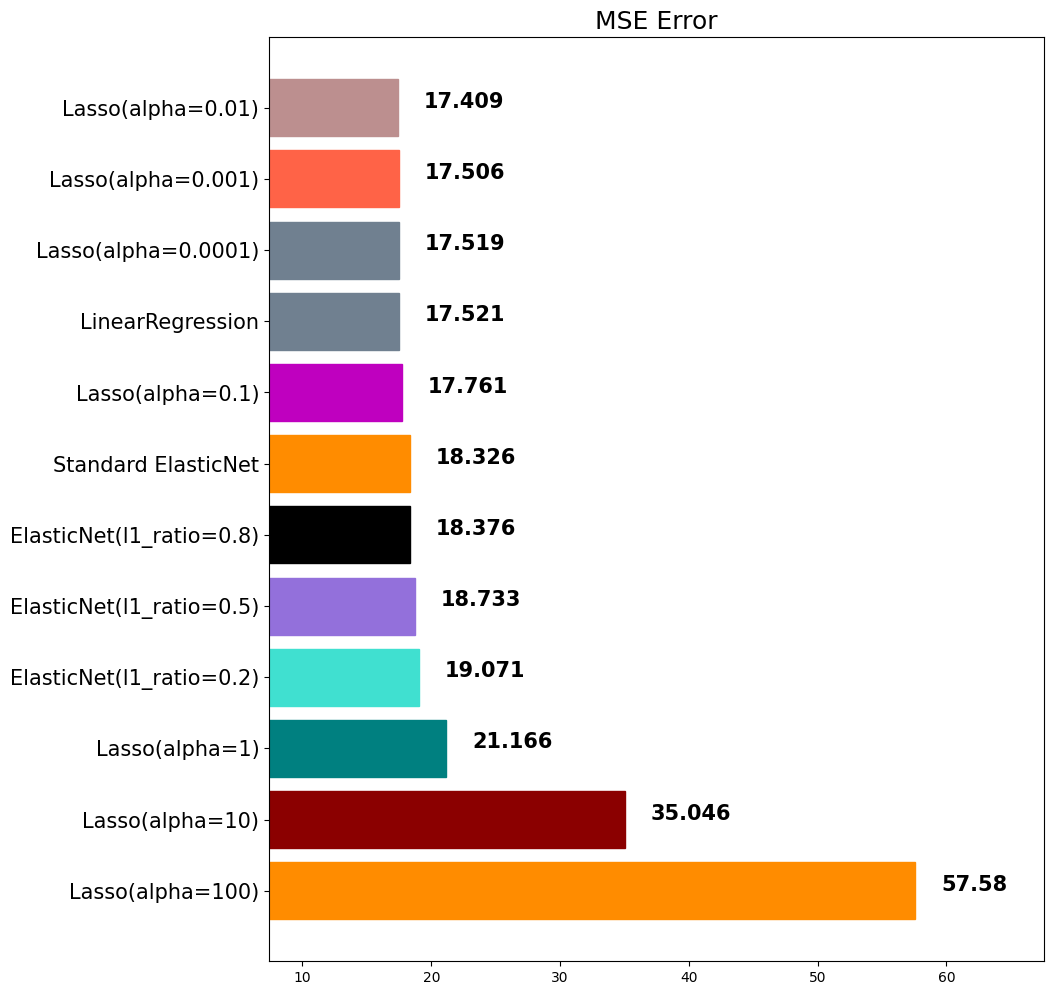

In [61]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

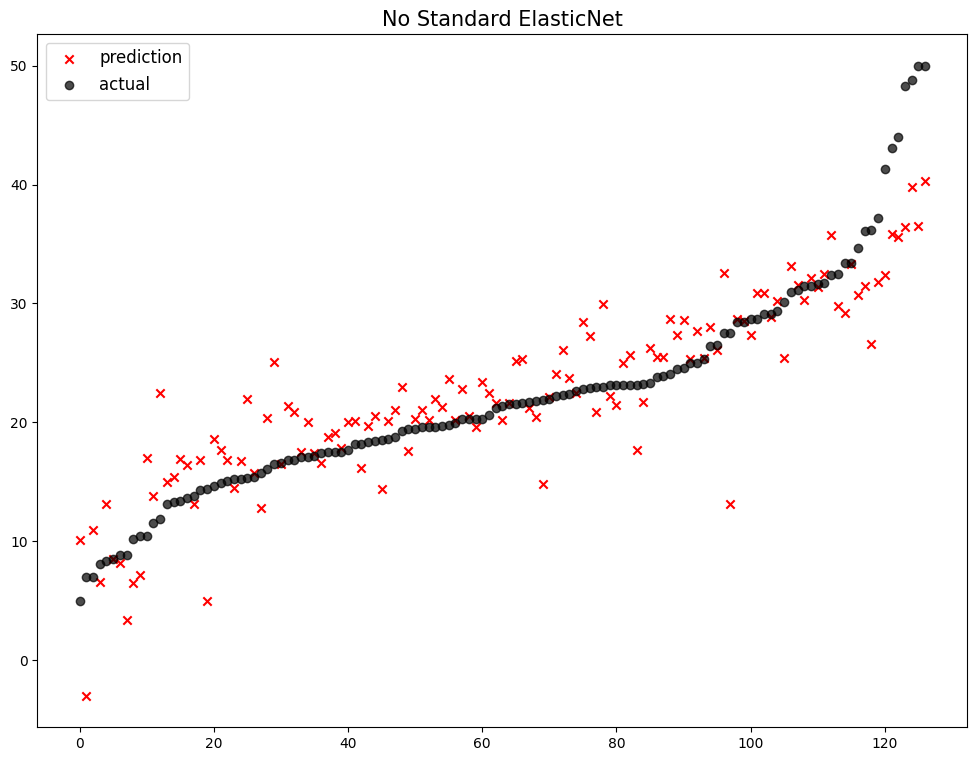

                       model        mse
0           Lasso(alpha=100)  57.580296
1            Lasso(alpha=10)  35.045617
2             Lasso(alpha=1)  21.165617
3   ElasticNet(l1_ratio=0.2)  19.070859
4   ElasticNet(l1_ratio=0.5)  18.732745
5   ElasticNet(l1_ratio=0.8)  18.376396
6        Standard ElasticNet  18.325763
7     No Standard ElasticNet  18.325763
8           Lasso(alpha=0.1)  17.760568
9           LinearRegression  17.520846
10       Lasso(alpha=0.0001)  17.519268
11        Lasso(alpha=0.001)  17.505523
12         Lasso(alpha=0.01)  17.409082


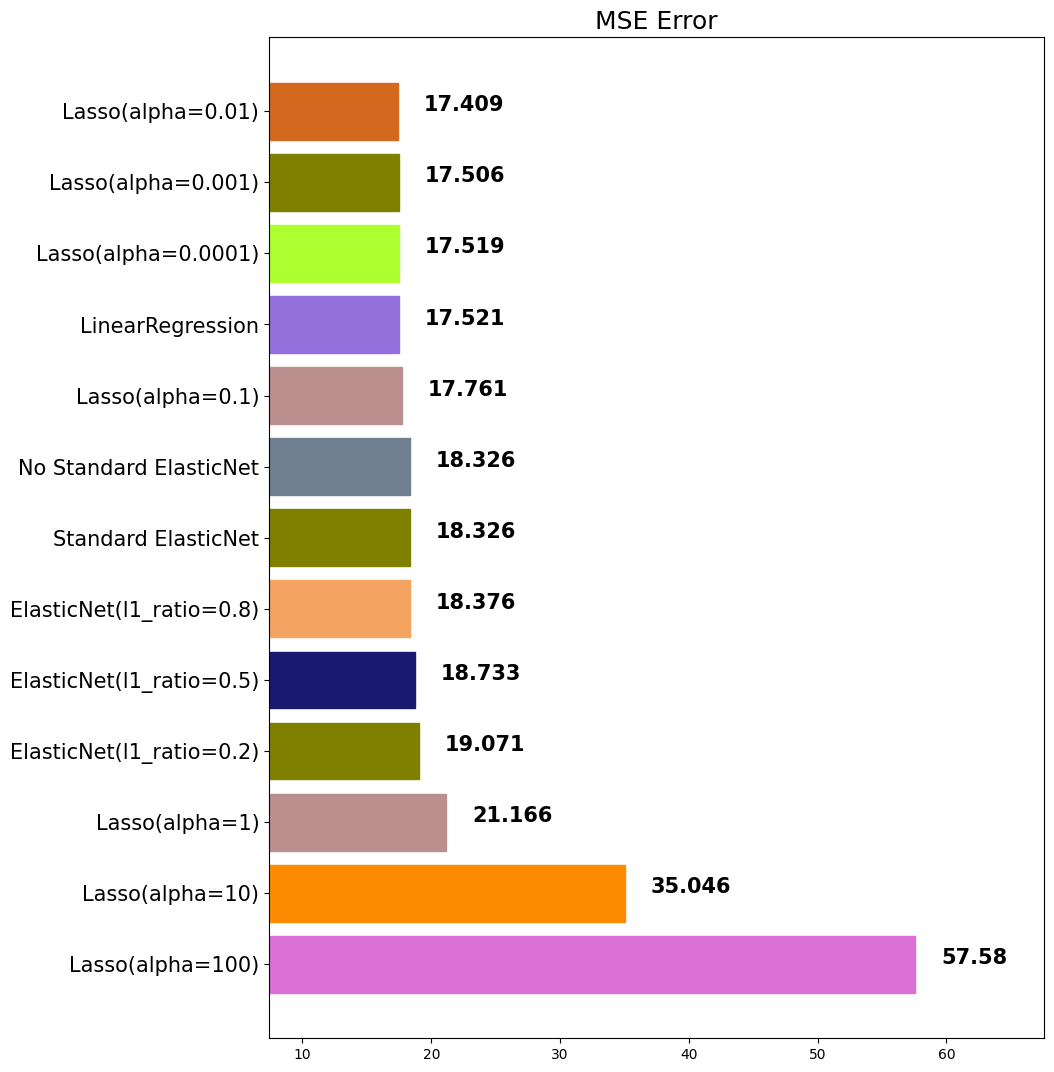

In [62]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [65]:
poly_features = poly.fit_transform(x_train)[0]

In [66]:
poly_features

array([     0.12269   ,      0.        ,      6.91      ,      0.        ,
            0.448     ,      6.069     ,     40.        ,      5.7209    ,
            3.        ,    233.        ,     17.9       ,    389.39      ,
            9.55      ,      0.01505284,      0.        ,      0.8477879 ,
            0.        ,      0.05496512,      0.74460561,      4.9076    ,
            0.70189722,      0.36807   ,     28.58677   ,      2.196151  ,
           47.7742591 ,      1.1716895 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     47.7481    ,      0.        ,
            3.09568   ,     41.93679   ,    276.4       ,     39.531419  ,
           20.73      ,   1610.03      ,    123.689     ,   2690.6849    ,
           65.9905    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [67]:
x_train.iloc[0]

CRIM         0.12269
ZN           0.00000
INDUS        6.91000
CHAS         0.00000
NOX          0.44800
RM           6.06900
AGE         40.00000
DIS          5.72090
RAD          3.00000
TAX        233.00000
PTRATIO     17.90000
B          389.39000
LSTAT        9.55000
Name: 44, dtype: float64

In [68]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [69]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.463e+01, tolerance: 3.246e+00
  model = cd_fast.enet_coordinate_descent(


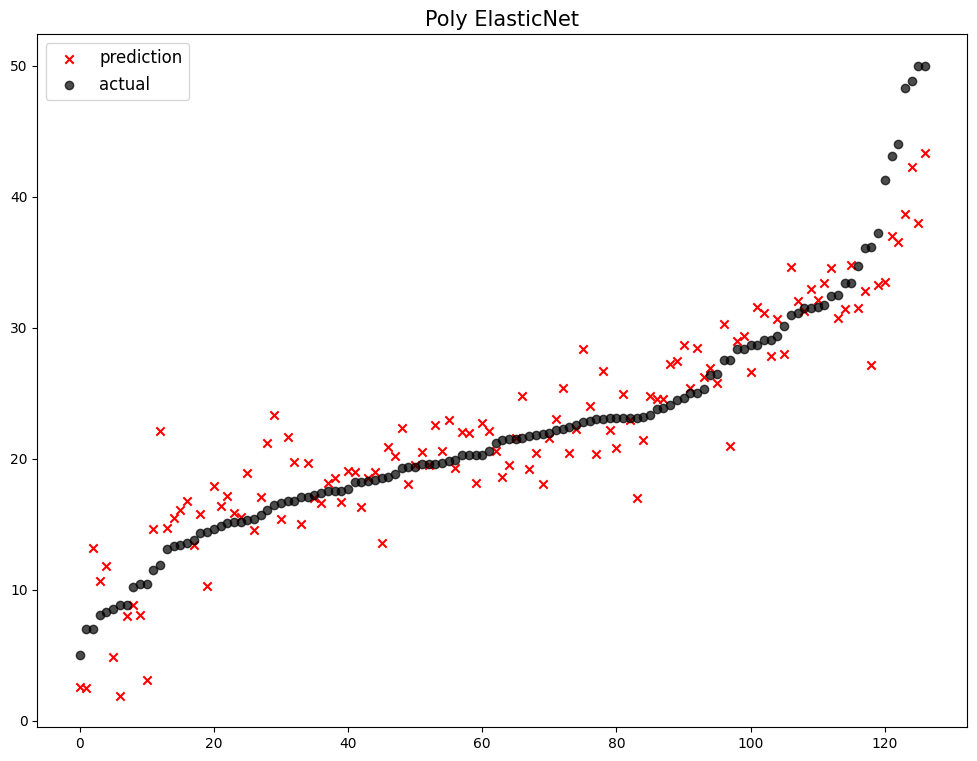

                       model        mse
0           Lasso(alpha=100)  57.580296
1            Lasso(alpha=10)  35.045617
2             Lasso(alpha=1)  21.165617
3   ElasticNet(l1_ratio=0.2)  19.070859
4   ElasticNet(l1_ratio=0.5)  18.732745
5   ElasticNet(l1_ratio=0.8)  18.376396
6        Standard ElasticNet  18.325763
7     No Standard ElasticNet  18.325763
8           Lasso(alpha=0.1)  17.760568
9           LinearRegression  17.520846
10       Lasso(alpha=0.0001)  17.519268
11        Lasso(alpha=0.001)  17.505523
12         Lasso(alpha=0.01)  17.409082
13           Poly ElasticNet  12.018909


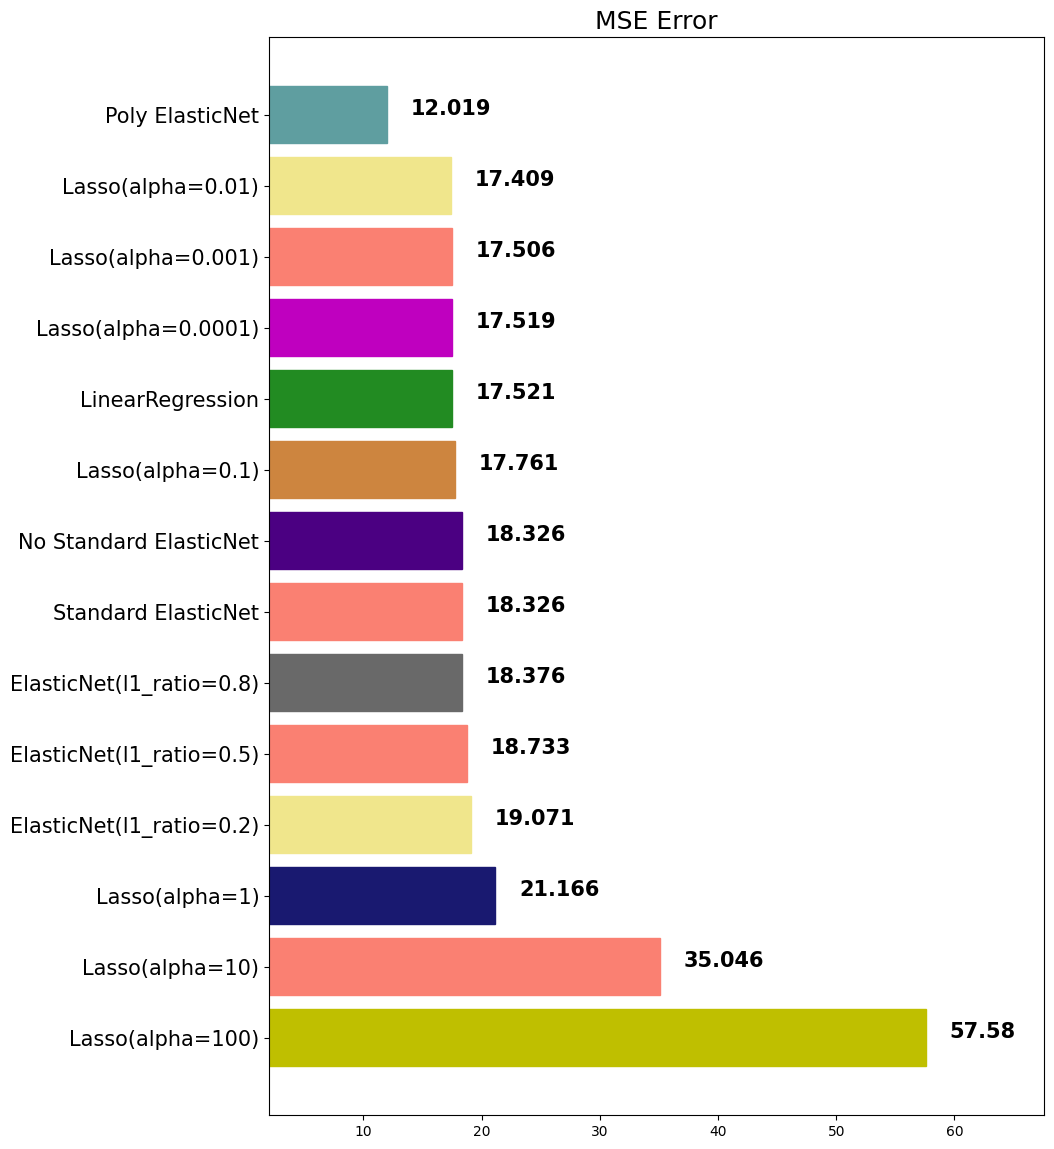

In [70]:
mse_eval('Poly ElasticNet', poly_pred, y_test)


---
## 📝 Key Takeaways & Insights
*   **What did we learn?**
    *   (여기에 핵심 배운 점을 기록하세요)
*   **Next Steps**:
    *   (다음 학습 단계)
